In [1]:
import random
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

2023-12-01 20:12:49.128025: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 20:12:49.158805: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 20:12:49.159393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 20:12:49.693619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# DATA PREPERATION PHASE TO MODEL THE DATA

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data_housing = pd.read_csv('housing.csv')

## 1:How to Partition the Data in Python

In [3]:
data['Grades'] = pd.qcut(data['Total Marks in %'],
                           q=[0, .2, .4, .6, .8, 1],
                           labels=['E', 'D', 'C', 'B', 'A'])

In [4]:
x= data.drop(columns=['gender','test preparation course'])
y= data['Grades']
print(x.shape,y.shape)

(1000, 8) (1000,)


In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20)

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(800, 8) (800,)
(200, 8) (200,)


## 2:How to Balance the Training Data Set in Python

In [6]:
# s = SMOTE()
# xTrain, yTrain = s.fit_resample(xTrain, yTrain)

## 3:How to Build CART Decision Trees Using Python

In [7]:
display(data_housing)
display(data_housing.describe())
display(data_housing.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [8]:
data_housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
# data_housing = data_housing.join(pd.get_dummies(data_housing.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   object  
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   Total Marks in %             1000 non-null   float64 
 9   Grades                       1000 non-null   category
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 71.6+ KB


In [11]:
data_housing['total_bedrooms'] = data_housing['total_bedrooms'].fillna(data_housing['total_rooms']*0.07)

data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
X = data_housing.drop(['ocean_proximity'], axis=1)
y = data_housing['ocean_proximity']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

[Text(0.5395047169811321, 0.9285714285714286, 'latitude <= 0.204\ngini = 0.673\nsamples = 16512\nvalue = [7338, 5236, 4, 1802, 2132]'),
 Text(0.29127358490566035, 0.7857142857142857, 'longitude <= 0.657\ngini = 0.487\nsamples = 8779\nvalue = [5964, 1428, 4, 0, 1383]'),
 Text(0.1509433962264151, 0.6428571428571429, 'longitude <= 0.522\ngini = 0.229\nsamples = 6060\nvalue = [5290, 257, 4, 0, 509]'),
 Text(0.07547169811320754, 0.5, 'latitude <= 0.199\ngini = 0.364\nsamples = 255\nvalue = [61, 0, 0, 0, 194]'),
 Text(0.03773584905660377, 0.35714285714285715, 'latitude <= 0.19\ngini = 0.133\nsamples = 167\nvalue = [12, 0, 0, 0, 155]'),
 Text(0.018867924528301886, 0.21428571428571427, 'longitude <= 0.518\ngini = 0.016\nsamples = 121\nvalue = [1, 0, 0, 0, 120]'),
 Text(0.009433962264150943, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.02830188679245283, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05660377358490566, 0.21428571428571427, 'longitude <= 0.464\ngini = 0.364\nsamples = 46\nvalu

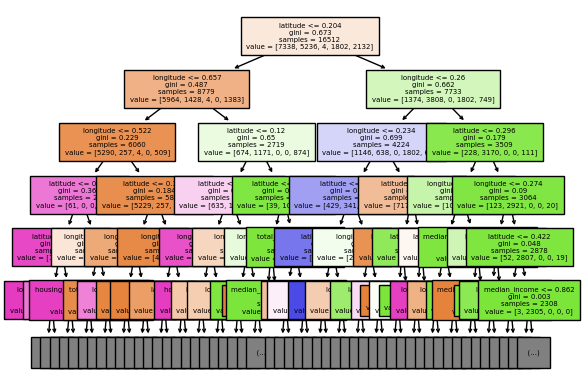

In [13]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, Y_train)
plot_tree(dTree, 
          feature_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value'],
          filled = True,
          fontsize= 5,
          max_depth=5)

In [15]:
dTree.score(X_test, Y_test)

0.9740794573643411

## 4:How to Build C5.0 Decision Trees Using Python

[Text(0.5154702970297029, 0.9285714285714286, 'longitude <= 0.234\nentropy = 1.778\nsamples = 16512\nvalue = [7338, 5236, 4, 1802, 2132]'),
 Text(0.26732673267326734, 0.7857142857142857, 'latitude <= 0.601\nentropy = 1.641\nsamples = 3121\nvalue = [429, 341, 0, 1802, 549]'),
 Text(0.15594059405940594, 0.6428571428571429, 'latitude <= 0.545\nentropy = 1.005\nsamples = 2322\nvalue = [135, 0, 0, 1744, 443]'),
 Text(0.07920792079207921, 0.5, 'longitude <= 0.214\nentropy = 1.49\nsamples = 745\nvalue = [129, 0, 0, 290, 326]'),
 Text(0.039603960396039604, 0.35714285714285715, 'housing_median_age <= 0.363\nentropy = 0.472\nsamples = 277\nvalue = [0, 0, 0, 28, 249]'),
 Text(0.019801980198019802, 0.21428571428571427, 'longitude <= 0.206\nentropy = 0.999\nsamples = 37\nvalue = [0, 0, 0, 19, 18]'),
 Text(0.009900990099009901, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0297029702970297, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0594059405940594, 0.21428571428571427, 'median_house_value <= 

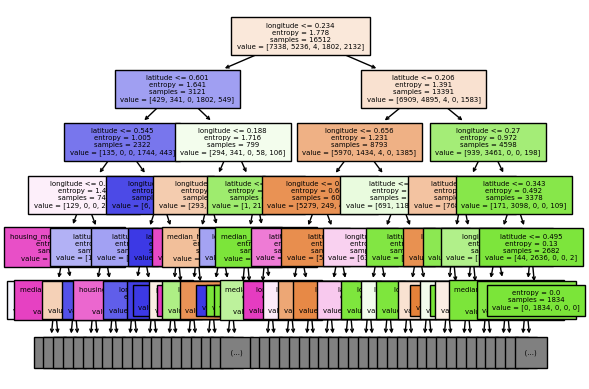

In [16]:
dTree = DecisionTreeClassifier(criterion='entropy')
dTree.fit(X_train, Y_train)
plot_tree(dTree, 
          feature_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value'],
          filled = True,
          fontsize= 5,
          max_depth=5)

In [18]:
dTree.score(X_test, Y_test)

0.9806201550387597

## 5:How to Build Random Forests Python

In [19]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
forest = RandomForestClassifier()

forest.fit(X_train_s, Y_train)

RandomForestClassifier()

In [20]:
forest.score(X_test_s, Y_test)

0.8851744186046512